In [1]:
# importações
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numba import njit


In [2]:
n = 100 # Network size
tf = 5000 # Iteration time
trans = tf - 100 # Transient time
sample_size = tf - trans # Size of the actual data
a = 3.98 # Logistic map parameter
xmin = 0 # Minimum allowed value of x
xmax = 1 # Maximum allowed value of x
prd = 1

# Funções

Acoplamento global 

$$x_{t+1}^i = (1 - \sigma)f(x_t^i) + \frac{\sigma}{N}\sum_{j=0}^{N} x_t^j$$

In [49]:
@njit
def network(x, sigma, a):
    # x = x_t^i, with i in [0,n]
    xout = np.zeros(len(x)) # x_t+1

    f = a*x*(1 - x) # Logistic map

    for i in range(n): # Global coupling
        coup = 0 # Weight
        for k in range(n):
            coup += f[k % n]
        xout[i] = (1 - sigma)*f[i] + sigma*coup/n

    return xout



# Run

```python
xdata = np.zeros((n, sample_size))
#np.random.seed(12031934)
np.random.seed(12031935)
x0 = np.random.rand(n)
#x0[:40] = 0.5
sigma = 0.03


state = 1
for i in range(tf):
    x = network(x0, sigma, a)
    if np.any(np.isnan(x)):
        print('NaN in x')
        state = -1
        break
    if i >= trans:
        xdata[:, i - trans] = x0
    x0 = x
print(f'state: {state}')
x_series = pd.Series(x0)
```

In [4]:
! gcc logistico-rede-global.c -o x.x
! ./x.x

dado_patricio = pd.read_csv('logredeglobal.dat', sep='\t',
                           header=None)
dado_patricio.columns = ['mapas','valor']
dado_patricio

,mapas,valor
0,1,0.087201
1,2,0.096086
2,3,0.897606
3,4,0.399472
4,5,0.981631
...,...,...
49995,496,0.220482
49996,497,0.822068
49997,498,0.353356
49998,499,0.982196


In [167]:
n = 500 # Network size
tf = 5000 # Iteration time
trans = tf - 200 # Transient time
sample_size = tf - trans # Size of the actual data
a = 4 # Logistic map parameter
xmin = 0.10 # Minimum allowed value of x
xmax = 0.90 # Maximum allowed value of x
prd = 1

sigma = 0.02

xdata = np.zeros((n, sample_size))
np.random.seed(12031935)
x0 = np.random.rand(n)
x0 = xmin + x0*(xmax - xmin)
#x0[:40] = 0.5

state = 1
for i in range(tf):
    x = network(x0, sigma, a)
    if np.any(np.isnan(x)):
        print('NaN in x')
        state = -1
        break
    if i >= trans:
        xdata[:, i - trans] = x0
    x0 = x
print(f'state: {state}')
x_series = pd.Series(x0)
x_dataframe = pd.DataFrame(xdata)

state: 1


In [168]:
x_dataframe.melt().groupby(by='variable')['value'].nunique().mean()

500.0

In [13]:
periodo = np.arange(0,100,2)

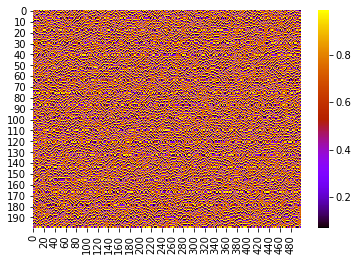

In [14]:
sns.heatmap(data =  x_dataframe.T, cmap='gnuplot')

In [15]:
meu_df = x_dataframe.melt()
meu_df['variable'] = dado_patricio['mapas']
meu_df

,variable,value
0,1.0,0.981439
1,2.0,0.908292
2,3.0,0.094730
3,4.0,0.636516
4,5.0,0.976445
...,...,...
99995,NaN,0.902848
99996,NaN,0.135813
99997,NaN,0.597027
99998,NaN,0.858698


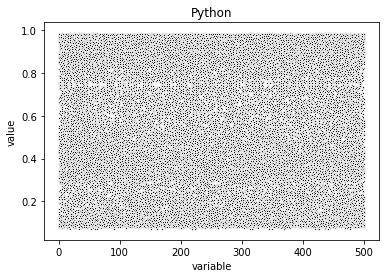

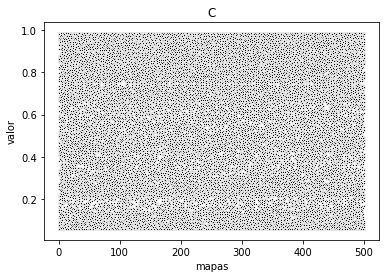

In [16]:
plt.figure()
sns.scatterplot(data = meu_df, 
               x='variable', y = 'value', color='black', s=3.5)
plt.title('Python')

plt.figure()
sns.scatterplot(data = dado_patricio, 
               x='mapas', y = 'valor', color='black', s=3.5)
plt.title('C')
plt.show()

In [25]:
def plota(x, sigma):
    fig, ax = plt.subplots()
    sns.scatterplot(data = x, x='variable', y = 'value', color='black', s=3.5, label='periodos')
    ax.set_title(f'$\sigma={sigma}$')
    ax.set_xlabel('Mapas')
    ax.set_ylabel(r'$X^i$')
    ax.set_ylim(-0.05,1.05)
    plt.show()

def varre_sigma(sigma):
    xdata = np.zeros((n, sample_size))
    np.random.seed(12031934)
    x0 = np.random.rand(n)
    #x0 = xmin + x0*(xmax - xmin)
    #x0[:40] = 0.5

    state = 1
    for i in range(tf):
        x = network(x0, sigma, a)
        if np.any(np.isnan(x)):
            print('NaN in x')
            state = -1
            break
        if i >= trans:
            xdata[:, i - trans] = x0
        x0 = x
    print(f'state: {state}')
    x_series = pd.Series(x0)
    x_dataframe = pd.DataFrame(xdata)
    
    x_dataframe = x_dataframe.melt()
    x_dataframe['variable'] = dado_patricio['mapas']
    
    plota(x_dataframe, sigma)
    
    return x_series, x_dataframe

state: 1


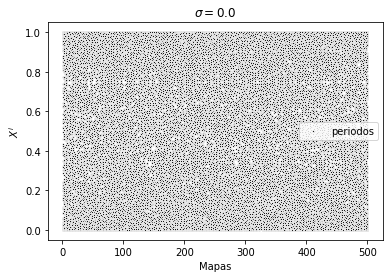

state: 1


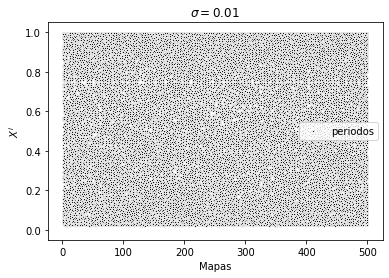

state: 1


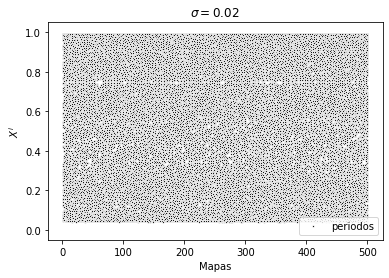

state: 1


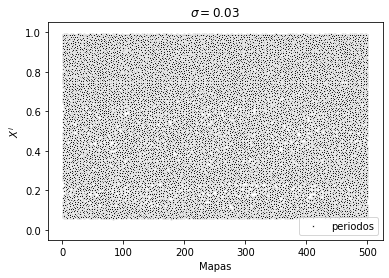

state: 1


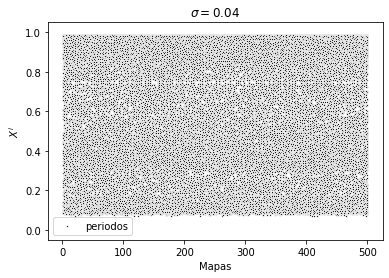

state: 1


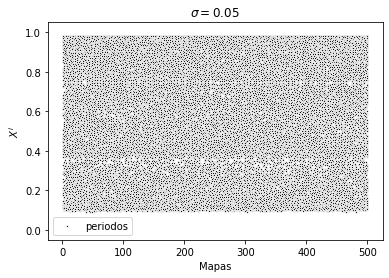

state: 1


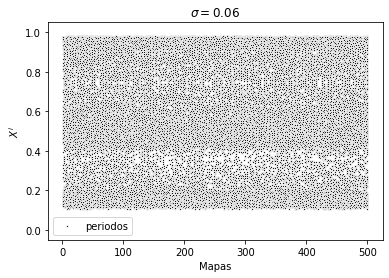

state: 1


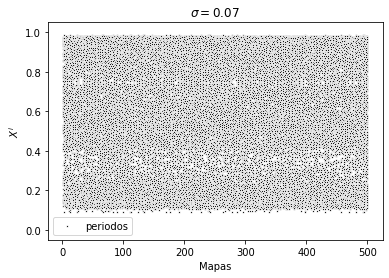

state: 1


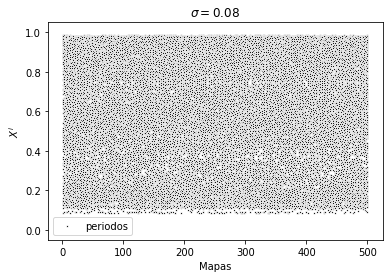

state: 1


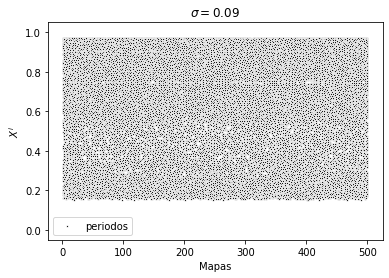

state: 1


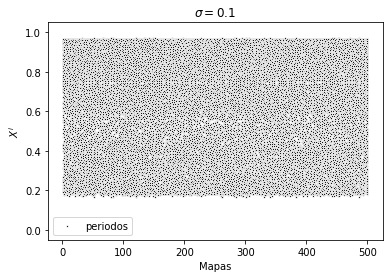

state: 1


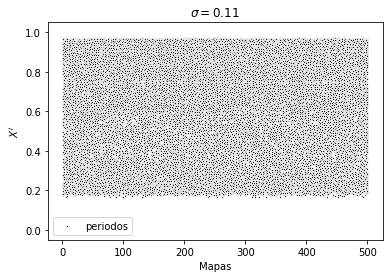

state: 1


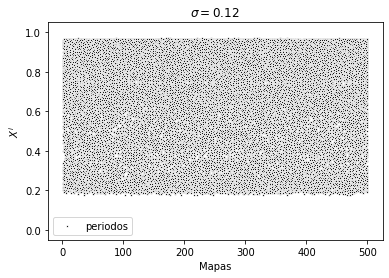

state: 1


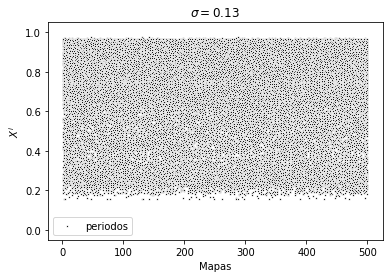

state: 1


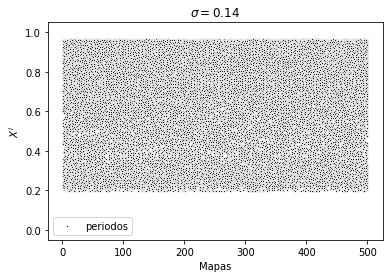

state: 1


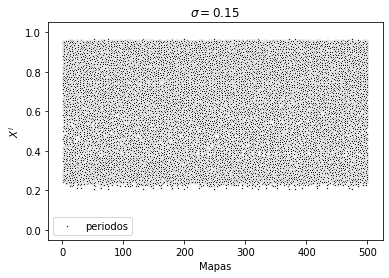

state: 1


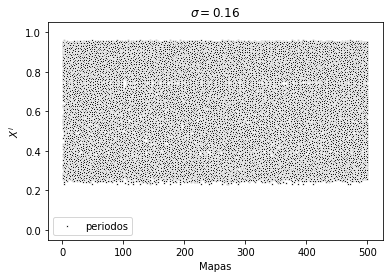

state: 1


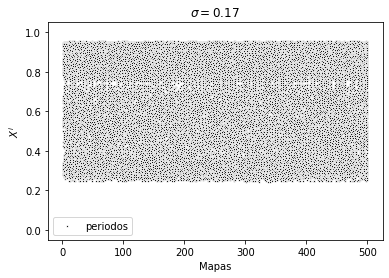

state: 1


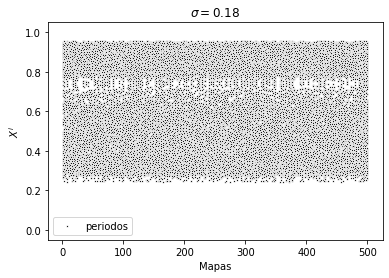

state: 1


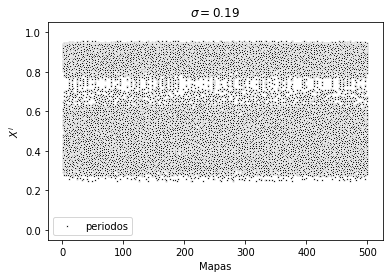

state: 1


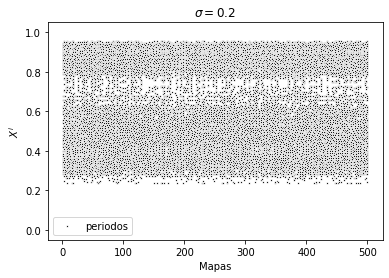

state: 1


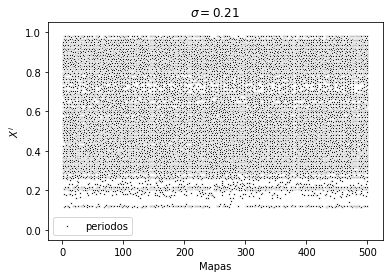

state: 1


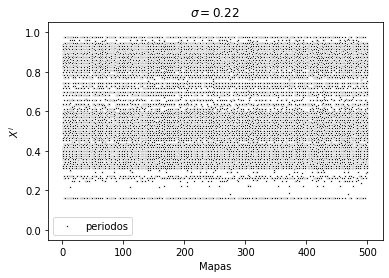

state: 1


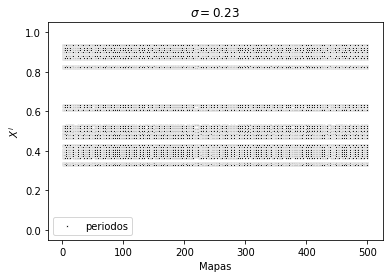

state: 1


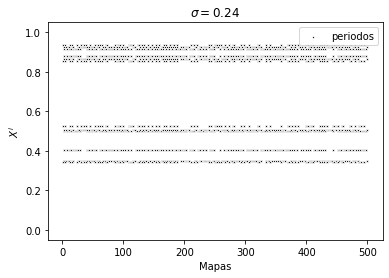

state: 1


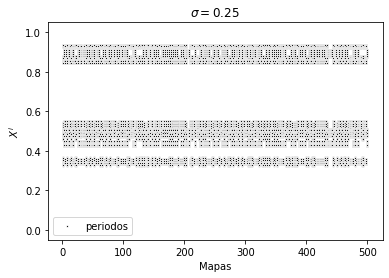

state: 1


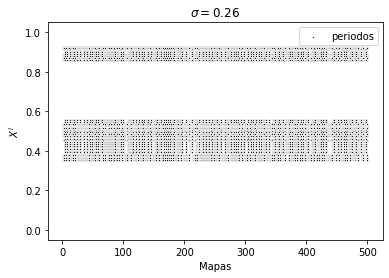

state: 1


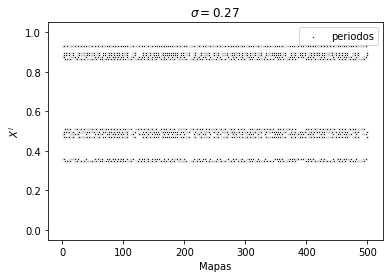

state: 1


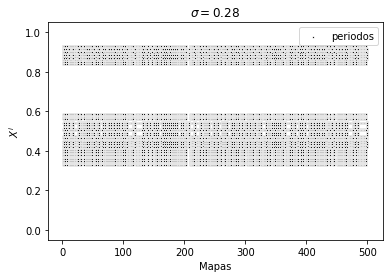

state: 1


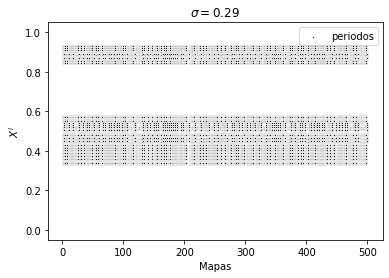

In [177]:
for sigma in np.arange(0.00,0.3,0.01):
    varre_sigma(sigma)

**Espaço de parâmetro**: 
> Parâmetro do mapa logistico $a$

> Parâemtro de acoplamento da rede $\sigma$

> Valor: Quantidade de períodos

In [158]:
param_a = np.linspace(3.4, 4.,30).round(4)
param_sigma = np.linspace(0.01, 0.1,30).round(4)

dados = pd.DataFrame({}, columns=param_a.round(4), index=param_sigma.round(4))
dados

,3.4000,3.4207,3.4414,3.4621,3.4828,3.5034,3.5241,3.5448,3.5655,3.5862,...,3.8138,3.8345,3.8552,3.8759,3.8966,3.9172,3.9379,3.9586,3.9793,4.0000
0.0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.0131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.0162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.0193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.0224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.0255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.0286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.0317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.0348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.0379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
n = 500 # Network size
tf = 1000 # Iteration time
trans = tf - 100 # Transient time
sample_size = tf - trans # Size of the actual data
#a = 4 # Logistic map parameter
xmin = 0.10 # Minimum allowed value of x
xmax = 0.90 # Maximum allowed value of x
for a in param_a:
    for sigma in param_sigma:
        xdata = np.zeros((n, sample_size))
        np.random.seed(12031935)
        x0 = np.random.rand(n)
        #x0 = xmin + x0*(xmax - xmin)
        #x0[:40] = 0.5

        state = 1
        for i in range(tf):
            x = network(x0, sigma, a)
            if np.any(np.isnan(x)):
                print('NaN in x')
                state = -1
                print(f'state: {state} | a: {a} | sigma: {sigma}')
                break
            if i >= trans:
                xdata[:, i - trans] = x0
            x0 = x
        print(f'state: {state} | a: {a} | sigma: {sigma}')
        x_dataframe = pd.DataFrame(xdata)
        dados.loc[sigma, a] = x_dataframe.melt().groupby(by='variable')['value'].nunique().mean()
        

state: 1 | a: 3.4 | sigma: 0.01
state: 1 | a: 3.4 | sigma: 0.0131
state: 1 | a: 3.4 | sigma: 0.0162
state: 1 | a: 3.4 | sigma: 0.0193
state: 1 | a: 3.4 | sigma: 0.0224
state: 1 | a: 3.4 | sigma: 0.0255
state: 1 | a: 3.4 | sigma: 0.0286
state: 1 | a: 3.4 | sigma: 0.0317
state: 1 | a: 3.4 | sigma: 0.0348
state: 1 | a: 3.4 | sigma: 0.0379
state: 1 | a: 3.4 | sigma: 0.041
state: 1 | a: 3.4 | sigma: 0.0441
state: 1 | a: 3.4 | sigma: 0.0472
state: 1 | a: 3.4 | sigma: 0.0503
state: 1 | a: 3.4 | sigma: 0.0534
state: 1 | a: 3.4 | sigma: 0.0566
state: 1 | a: 3.4 | sigma: 0.0597
state: 1 | a: 3.4 | sigma: 0.0628
state: 1 | a: 3.4 | sigma: 0.0659
state: 1 | a: 3.4 | sigma: 0.069
state: 1 | a: 3.4 | sigma: 0.0721
state: 1 | a: 3.4 | sigma: 0.0752
state: 1 | a: 3.4 | sigma: 0.0783
state: 1 | a: 3.4 | sigma: 0.0814
state: 1 | a: 3.4 | sigma: 0.0845
state: 1 | a: 3.4 | sigma: 0.0876
state: 1 | a: 3.4 | sigma: 0.0907
state: 1 | a: 3.4 | sigma: 0.0938
state: 1 | a: 3.4 | sigma: 0.0969
state: 1 | a: 3.4 

Text(51.0, 0.5, '$a$')

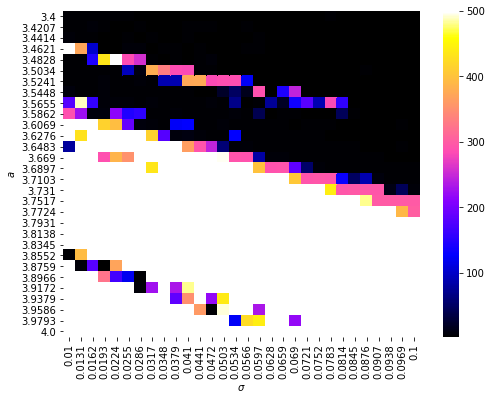

In [175]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(data = dados.dropna().astype(float).T, cmap='gnuplot2')

ax.set_xlabel("$\sigma$")
ax.set_ylabel("$a$")


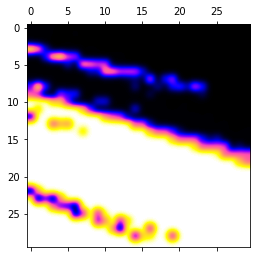

In [176]:
plt.matshow(dados.dropna().astype(float).T, aspect='auto', interpolation='gaussian', cmap='gnuplot2')